In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
mentalhealth_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project/Mental Health Dataset.csv')
print (f"Dataset Shape: {mentalhealth_df.shape}")


Dataset Shape: (10392, 3)


In [4]:
mentalhealth_df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [6]:
# Column names
print(f"Feature Names : {mentalhealth_df.columns.values}")

Feature Names : ['posts' 'predicted' 'intensity']


In [7]:
# Check rows with nulls
mentalhealth_df.isnull().sum().sort_values(ascending = False)

posts        1
predicted    0
intensity    0
dtype: int64

In [8]:
# Getting the record where the data is null
mentalhealth_df[mentalhealth_df['posts'].isna()== True]

,posts,predicted,intensity
3979,NaN,neutral,0


In [9]:
# Drop the data which is null
mentalhealth_df = mentalhealth_df[mentalhealth_df['posts'].notna()]
mentalhealth_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10391 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10391 non-null  object
 2   intensity  10391 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 324.7+ KB


In [10]:
print(f"Dataset shape after dropping null values : {mentalhealth_df.shape}")

Dataset shape after dropping null values : (10391, 3)


In [11]:
mentalhealth_df_new = mentalhealth_df.drop(columns = ['intensity'])
print(mentalhealth_df_new)

                                                   posts      predicted
0      I know as parent of child with down syndrome t...       negative
1      but in my heart I know this is the future prom...        neutral
2      I have mylefibrosis which turn to leukemia the...       negative
3      from one of my health group subject wayne dyer...        neutral
4      gmos now link to leukemia http nsnbc I 2013 07...        neutral
...                                                  ...            ...
10387  hey everyone I am a 25 year old male I work ou...       negative
10388  have surgery for stage 1 colon cancer 1 year a...  very negative
10389  the doctor advise we he could not remove the a...        neutral
10390  my 66 year old father have been through so muc...        neutral
10391  I have bein have a bloody stool since last yea...       negative

[10391 rows x 2 columns]


## Analyzing columns

In [12]:
print(f"Predicted value count : \n{mentalhealth_df_new['predicted'].value_counts()}")

Predicted value count : 
neutral          4374
negative         4112
very negative    1155
positive          750
Name: predicted, dtype: int64


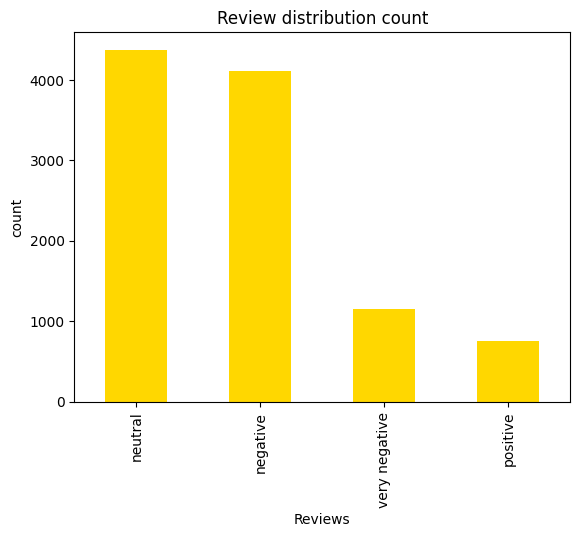

In [14]:
# Bar Plot to visualise the total counts of each review
mentalhealth_df['predicted'].value_counts().plot.bar(color = 'gold')
plt.title("Review distribution count")
plt.xlabel('Reviews')
plt.ylabel('count')
plt.show()

In [15]:
mentalhealth_df_new['char_count'] = mentalhealth_df_new['posts'].apply(len)

In [ ]:
mentalhealth_df_new.head()

,posts,predicted,char_count
0,I know as parent of child with down syndrome t...,negative,2164
1,but in my heart I know this is the future prom...,neutral,3191
2,I have mylefibrosis which turn to leukemia the...,negative,2176
3,from one of my health group subject wayne dyer...,neutral,1668
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,80


In [16]:
mentalhealth_df_new[mentalhealth_df_new['predicted']=='negative']['char_count'].mean()

1096.4413910505837

In [17]:
mentalhealth_df_new[mentalhealth_df_new['predicted']=='neutral']['char_count'].mean()

1275.6090534979423

In [18]:
mentalhealth_df_new[mentalhealth_df_new['predicted']=='positive']['char_count'].mean()

1240.0746666666666

In [19]:
mentalhealth_df_new[mentalhealth_df_new['predicted']=='very negative']['char_count'].mean()

1059.9307359307359

In [20]:


custom_stopwords = {'do',"don't",'ain','are',"aren't","could","couldn't",
                    'did',"didn't","does","doesn't","had","hadn't","has","hasn't",
                    "have","haven't","is","isn't","might","mightn't", "must","mustn't",
                    "need","needn't","no","nor","not","should","shouldn't","was","wasn't",
                    "would","wouldn't","were","weren't","won","won't","down"}

corpus = []
ps = PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for i, post in enumerate(mentalhealth_df_new['posts']):
    review = re.sub('[^a-zA-Z]',' ', post)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

# Ensure lengths match
if len(corpus) != len(mentalhealth_df_new):
    print("Length mismatch. Truncating corpus.")
    corpus = corpus[:len(mentalhealth_df_new)]

# Assign processed text to the DataFrame
mentalhealth_df_new['processed_text'] = corpus


In [21]:
mentalhealth_df_new.head()

,posts,predicted,char_count,processed_text
0,I know as parent of child with down syndrome t...,negative,2164,know parent child down syndrom have hear child...
1,but in my heart I know this is the future prom...,neutral,3191,heart know is futur promis articl regardless h...
2,I have mylefibrosis which turn to leukemia the...,negative,2176,have mylefibrosi turn leukemia want do stem ce...
3,from one of my health group subject wayne dyer...,neutral,1668,one health group subject wayn dyer leukemia ca...
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,80,gmo link leukemia http nsnbc gmo link leukemia...


In [22]:
wc = WordCloud(width = 500, height = 500, min_font_size = 8, background_color = "white" )

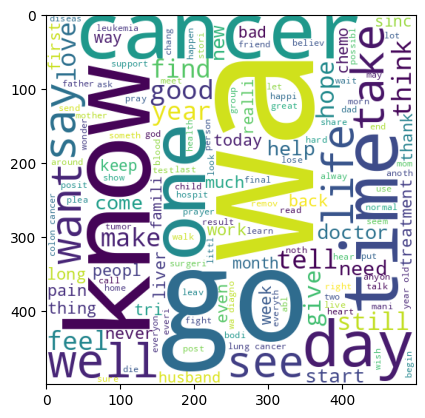

In [24]:
# Word Cloud for positive reviews
pos = wc.generate(mentalhealth_df_new[mentalhealth_df_new['predicted']=='positive']['processed_text'].str.cat(sep = " "))
plt.imshow(pos)

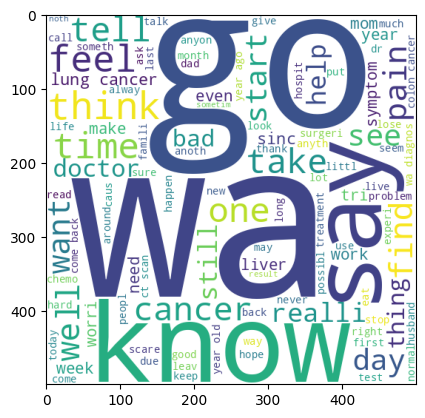

In [25]:
# Word Cloud for negative reviews
neg = wc.generate(mentalhealth_df_new[mentalhealth_df_new['predicted']=='negative']['processed_text'].str.cat(sep = " "))
plt.imshow(neg)

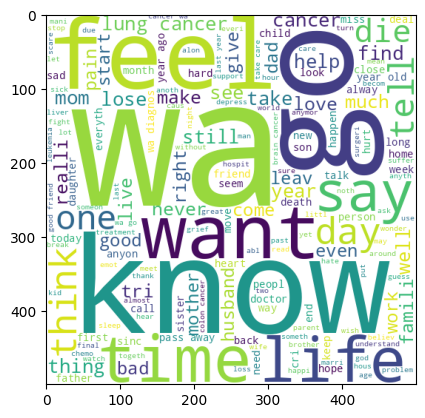

In [26]:
# Word Cloud for very negative reviews
vneg = wc.generate(mentalhealth_df_new[mentalhealth_df_new['predicted']=='very negative']['processed_text'].str.cat(sep = " "))
plt.imshow(vneg)

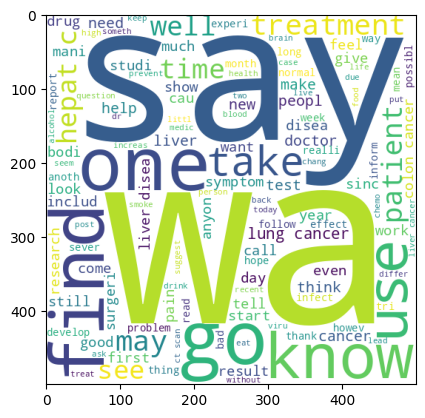

In [27]:
# Word Cloud for neutral reviews
neu = wc.generate(mentalhealth_df_new[mentalhealth_df_new['predicted']=='neutral']['processed_text'].str.cat(sep = " "))
plt.imshow(neu)

In [29]:
posts = mentalhealth_df_new['processed_text'].values
predicted = mentalhealth_df_new['predicted'].values


In [30]:
print(posts)

['know parent child down syndrom have hear child are high risk leukemia parent read say well not happen child well have turn yr old start bruis thought leukemia breafli cross mind quickli push mind ration say wa rough play yr old wa normal bruis have go work month have get littl fussi whinni is normal right well get sick like lot child down get sick get sick take doc friday say have cold tell boss wa sick not surpis call say wa hospit offten have do get sick say ok sit get sure enough wa much sicker take er tell have rsv send home med time get home wa much bad take back time order test put hospit world start come down around first say blood work come back bad want retest wa probley noth come back say want move icu keep well start get scare thought come back leukemia put tri push mind no one want think bad well wa not long doc come say believ william have leukemia quickli fli beaumont tx houston tx texa children hospit is do realli well is remis still have yr chemo wa run around not wal

In [31]:
print(predicted)

['negative' 'neutral' 'negative' ... 'neutral' 'neutral' 'negative']


## Split the Dataset

In [32]:
x_train, x_test, y_train, y_test = train_test_split(posts,predicted,test_size = 0.20,stratify = predicted, random_state = 42)

In [33]:
print(posts.shape,x_train.shape,x_test.shape)

(10391,) (8312,) (2079,)


In [34]:
print(predicted.shape,y_train.shape,y_test.shape)

(10391,) (8312,) (2079,)


In [35]:
print(x_train)

['hello sorri have touch glad see new member use love forum support want add littl fun major setback have second round consolid wa stay home neutropenia have littl chill one night go bed instead er note alway go er right away wake bad shape somehow get across street hospit ye live across street fianc is er doc hospit treat fall septic shock wa icu day go presser get bp wa true scare day number come back keep icu have call icu psychosi wa deliri have not sleep worri have dr round appar one day shut one eye think wa pirat whole day not kid wa say arggh talk everyon pirat voic do not rememb get well dr call one eye jack were happi come back realli scari situat well could were no sign leukemia end scari blip radar noth wa blood infect caus sepsi know even sepsi beat send love board one eye jack'
 'year old have have realli bad anal fissur long time littl year have two bowel movement januari contain blood toilet wa diagnos fissur ok clear month have have lot consitp diorreah have late have 

In [36]:
print(x_test)

['share photo garden is memori garden dedic sister lose lung cancer tribut good friend pass away breast cancer father die kidney cancer daili inspir are honor etern presenc life sever month year plumeria look like stick have sever branch are barren without leav come produc love leav eventu beauti fragrant yellow blossom plumeria have surviv hurrican rita wa gift friend wa send mani broken branch hurrican gentli nurtur root have give away gift know far florida rescu plumeria have travel remind not count anyon surviv is amaz pleas rememb use piclen highlight detail photo http mysisterdalesgarden com photo galleri monica would like receiv daili gift mysisterdalesgarden inspir pleas contact is beauti joy termin diagnosi miriam'
 'father have ct scan last month have checkup doctor coupl day is send do bronchoscopi see group lymph node enlarg middl part lung mediastinum sorri english is bad larg one x do not know is is concern might bad last time do scan wa decemb larg ln wa around time also

In [96]:
print(y_test)

['neutral' 'neutral' 'neutral' ... 'negative' 'neutral' 'negative']


In [37]:
# Coverting the textual data to numerical data

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [38]:
print(x_train)

  (0, 2723)	0.0672076783768282
  (0, 21313)	0.054794449560544835
  (0, 2175)	0.07465832422077646
  (0, 7977)	0.03952343806216773
  (0, 13126)	0.027635278968816058
  (0, 21343)	0.2272713086702045
  (0, 3739)	0.04351599744227807
  (0, 11980)	0.05591753906917172
  (0, 2660)	0.03926383137337797
  (0, 16585)	0.05005396580207488
  (0, 19516)	0.13158819922851475
  (0, 2634)	0.13158819922851475
  (0, 7592)	0.05005396580207488
  (0, 13597)	0.04894194593005219
  (0, 21728)	0.06222635917414547
  (0, 16441)	0.03296427609979549
  (0, 5217)	0.03541723831945607
  (0, 21847)	0.0651321758976681
  (0, 21040)	0.16059925799631009
  (0, 19709)	0.038578281767797484
  (0, 10346)	0.06095794539626407
  (0, 26102)	0.07529679496457428
  (0, 12476)	0.20735090057869895
  (0, 26080)	0.06751890340054836
  (0, 20072)	0.060921110112682246
  :	:
  (8311, 19524)	0.1734035694590848
  (8311, 19485)	0.16833339026657748
  (8311, 19004)	0.1983004981179598
  (8311, 10912)	0.1429782450428977
  (8311, 23979)	0.35410483015995814

In [39]:
print(x_test)

  (0, 26647)	0.08515203337211462
  (0, 26635)	0.0292482031388819
  (0, 26457)	0.030496656454482903
  (0, 26345)	0.053909889491399014
  (0, 25841)	0.04649612571553956
  (0, 25305)	0.046009311626399096
  (0, 24527)	0.08761669776254541
  (0, 24465)	0.08485061415801971
  (0, 23699)	0.07071360007844044
  (0, 23192)	0.13523226392366178
  (0, 22700)	0.08033568923690386
  (0, 21836)	0.057901794441679554
  (0, 21491)	0.056824556631590854
  (0, 21419)	0.10246790209019503
  (0, 21313)	0.056926483104996976
  (0, 20598)	0.10430549809368843
  (0, 20467)	0.13317722134796806
  (0, 20176)	0.11688449250825009
  (0, 20079)	0.0850006060894222
  (0, 20072)	0.06329152995204908
  (0, 19762)	0.06068927715925458
  (0, 19028)	0.0747253581396498
  (0, 18868)	0.08022385816873498
  (0, 18472)	0.4430299009176139
  (0, 18423)	0.09486108661006436
  :	:
  (2078, 7445)	0.058402040160185395
  (2078, 7174)	0.06565755795057784
  (2078, 6764)	0.1412353883420794
  (2078, 6759)	0.09812102019907631
  (2078, 5234)	0.0796523239

# Training the Machine Learning Model

In [40]:
model = LogisticRegression(max_iter = 1000)

In [41]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [42]:
# Accuracy score on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [43]:
print("Accuracy Score on the training data : ",training_data_accuracy)

Accuracy Score on the training data :  0.8426371511068335


In [44]:
# Accuracy score on testing data
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [45]:
print("Accuracy Score on the test data : ",testing_data_accuracy)

Accuracy Score on the test data :  0.7412217412217412


Model accuracy = 74.12%

In [97]:
#Prediction???
print(x_test_prediction)
print(y_test)


['neutral' 'negative' 'neutral' ... 'negative' 'neutral' 'negative']
['neutral' 'neutral' 'neutral' ... 'negative' 'neutral' 'negative']


In [47]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [48]:
# Accuracy score on training data
x_train_prediction_rf = rf.predict(x_train)
training_data_accuracy_rf = accuracy_score(y_train, x_train_prediction)
print("Accuracy Score on the training data : ",training_data_accuracy_rf)

Accuracy Score on the training data :  0.8426371511068335


In [49]:
# Accuracy score on testing data
x_test_prediction_rf = rf.predict(x_test)
testing_data_accuracy_rf = accuracy_score(y_test, x_test_prediction)
print("Accuracy Score on the test data : ",testing_data_accuracy_rf)

Accuracy Score on the test data :  0.7412217412217412


Model accuracy = 74.12%

## UNIGRAM FEATURES

In [75]:
subset = mentalhealth_df_new[:4000]
subset.shape
subset.head()

,posts,predicted,char_count,processed_text
0,I know as parent of child with down syndrome t...,negative,2164,know parent child down syndrom have hear child...
1,but in my heart I know this is the future prom...,neutral,3191,heart know is futur promis articl regardless h...
2,I have mylefibrosis which turn to leukemia the...,negative,2176,have mylefibrosi turn leukemia want do stem ce...
3,from one of my health group subject wayne dyer...,neutral,1668,one health group subject wayn dyer leukemia ca...
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,80,gmo link leukemia http nsnbc gmo link leukemia...


In [76]:
review = subset['processed_text']
sentiment = subset['predicted']
data_with_labels = list(zip(review,sentiment))
print("data_with_labels: ", data_with_labels[0])

data_with_labels:  ('know parent child down syndrom have hear child are high risk leukemia parent read say well not happen child well have turn yr old start bruis thought leukemia breafli cross mind quickli push mind ration say wa rough play yr old wa normal bruis have go work month have get littl fussi whinni is normal right well get sick like lot child down get sick get sick take doc friday say have cold tell boss wa sick not surpis call say wa hospit offten have do get sick say ok sit get sure enough wa much sicker take er tell have rsv send home med time get home wa much bad take back time order test put hospit world start come down around first say blood work come back bad want retest wa probley noth come back say want move icu keep well start get scare thought come back leukemia put tri push mind no one want think bad well wa not long doc come say believ william have leukemia quickli fli beaumont tx houston tx texa children hospit is do realli well is remis still have yr chemo wa

## Split the Dataset

In [77]:
train_set, test_set = train_test_split(data_with_labels, test_size=0.2,random_state=7)
print("Number of training reviews:", len(train_set))
print("train_set[0]: ", train_set[0])
print("Number of testing reviews:", len(test_set))
#print("test_set[0]: ", test_set[0])

Number of training reviews: 3200
train_set[0]:  ('want post say happi father dad support group woman are marri have husband are dad lose dad due lung cancer wish could call tell happi father day bad heaven do not have phone would pick phone right still have dad pick phone tell love is great dad thank is do life happi father day have wonder day', 'positive')
Number of testing reviews: 800


## Building Unigram Feature Sets

In [78]:
def unigram_features(data) -> [(dict, str)]:
    cancer_reviews = [d[0] for d in data]
    cancer_sentiment = [d[1] for d in data]
    feature_dicts = [{word: True for word in nltk.word_tokenize(str(cancer_review))} for cancer_review in cancer_reviews]
    return list(zip(feature_dicts, cancer_sentiment))

In [79]:
#Example of unigram features for one of the medical transcripts
import nltk
nltk.download('punkt')
debug_feature_sets = unigram_features(train_set)
debug_sample = debug_feature_sets[10]
print(debug_sample)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


({'wa': True, 'not': True, 'sure': True, 'post': True, 'feel': True, 'realli': True, 'depress': True, 'everyth': True, 'friend': True, 'mine': True, 'is': True, 'die': True, 'skin': True, 'cancer': True, 'age': True, 'hospic': True, 'husband': True, 'have': True, 'go': True, 'brain': True, 'bone': True, 'week': True, 'leav': True, 'find': True, 'news': True, 'missdigons': True, 'tell': True, 'fine': True, 'messag': True, 'facebook': True, 'hear': True, 'back': True, 'sad': True, 'angri': True, 'doctor': True, 'stress': True, 'sleep': True, 'year': True, 'ago': True, 'weird': True, 'fact': True, 'daughter': True, 'gay': True, 'lose': True, 'struggl': True, 'part': True, 'time': True, 'work': True, 'sick': True, 'benefit': True, 'previou': True, 'accid': True, 'night': True, 'chronic': True, 'pain': True, 'flear': True, 'badli': True, 'consid': True, 'kill': True, 'med': True, 'do': True, 'earli': True, 'morn': True, 'talk': True, 'partner': True, 'deal': True, 'massiv': True, 'issu': Tr

In [80]:
debug_feature_sets = unigram_features(train_set)
classifier = nltk.NaiveBayesClassifier.train(debug_feature_sets)

In [81]:
#Prediction
test_feature_sets = unigram_features(test_set)
test_dict = test_feature_sets[0][0]
print("real value: ", test_feature_sets[0][1])
prediction = classifier.classify(test_dict)
print("predicted value: ", prediction)

#Evaluation
def evaluate_classifier(classifier, test_data) -> float:
    test_feature_sets = unigram_features(test_data)
    return nltk.classify.accuracy(classifier,test_feature_sets)
acc = evaluate_classifier(classifier, test_set)
print(acc)

real value:  neutral
predicted value:  neutral
0.5775


In [82]:
num_test_labels = len(test_set)
print("num_test_labels: ", num_test_labels)

true_labels = []
for i in range(num_test_labels):
    true_labels.append(test_feature_sets[i][1])
print("true_labels: ", true_labels)

predicted_labels = []
for i in range(num_test_labels):
    prediction = classifier.classify(test_feature_sets[i][0])
    predicted_labels.append(prediction)
print("predicted_labels: ", predicted_labels)

print(classification_report(true_labels, predicted_labels))

num_test_labels:  800
true_labels:  ['neutral', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'very negative', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'very negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'very negative', 'neutral', 'negative', 'negative', 'very negative', 'neutral', 'neutral', 'very negative', 'neutral', 'negative', 'neutral', 'negative', 'very negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'neutral', 'negative', 'neutral', 'positive', 'negative', 'negative', 'positive', 'positive', 'very negative', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'very negative', 'very negative', 'positive', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'very negative', 'negative', 'very negative', 'neutral', 'n

## Building Bigram feature sets

In [83]:
def bigram_features(data) -> [(dict, str)]:
    cancer_reviews = [d[0] for d in data]
    cancer_sentiment = [d[1] for d in data]
    feature_dicts = [{word: True for word in nltk.bigrams(nltk.word_tokenize(str(cancer_review)))} for cancer_review in cancer_reviews]
    return list(zip(feature_dicts, cancer_sentiment))

In [84]:
#Example of bigram features for one of the medical transcripts
debug_feature_sets = bigram_features(train_set)
debug_sample = debug_feature_sets[10]
print(debug_sample)

({('wa', 'not'): True, ('not', 'sure'): True, ('sure', 'post'): True, ('post', 'feel'): True, ('feel', 'realli'): True, ('realli', 'depress'): True, ('depress', 'everyth'): True, ('everyth', 'friend'): True, ('friend', 'mine'): True, ('mine', 'is'): True, ('is', 'die'): True, ('die', 'skin'): True, ('skin', 'cancer'): True, ('cancer', 'is'): True, ('is', 'age'): True, ('age', 'is'): True, ('is', 'hospic'): True, ('hospic', 'husband'): True, ('husband', 'cancer'): True, ('cancer', 'have'): True, ('have', 'go'): True, ('go', 'brain'): True, ('brain', 'bone'): True, ('bone', 'have'): True, ('have', 'week'): True, ('week', 'leav'): True, ('leav', 'find'): True, ('find', 'news'): True, ('news', 'wa'): True, ('wa', 'missdigons'): True, ('missdigons', 'tell'): True, ('tell', 'wa'): True, ('wa', 'fine'): True, ('fine', 'have'): True, ('have', 'messag'): True, ('messag', 'facebook'): True, ('facebook', 'not'): True, ('not', 'hear'): True, ('hear', 'back'): True, ('back', 'feel'): True, ('feel',

In [85]:
bigram_feature_sets = bigram_features(train_set)
bigram_classifier = nltk.NaiveBayesClassifier.train(bigram_feature_sets)

In [86]:
#Prediction
test_feature_sets = bigram_features(test_set)
test_dict = test_feature_sets[1][0]
print("real value: ", test_feature_sets[1][1])
prediction = bigram_classifier.classify(test_dict)
print("predicted value: ", prediction)

#Evaluation
def evaluate_bigram_classifier(classifier, test_data) -> float:
    test_feature_sets = bigram_features(test_data)
    return nltk.classify.accuracy(classifier, test_feature_sets)

acc_bigram = evaluate_bigram_classifier(bigram_classifier, test_set)
print(acc_bigram)

real value:  negative
predicted value:  positive
0.3425


In [87]:
num_test_labels = len(test_set)
print("num_test_labels: ", num_test_labels)

true_labels = []
for i in range(num_test_labels):
    true_labels.append(test_feature_sets[i][1])
print("true_labels: ", true_labels)

predicted_labels = []
for i in range(num_test_labels):
    prediction = bigram_classifier.classify(test_feature_sets[i][0])
    predicted_labels.append(prediction)
print("predicted_labels: ", predicted_labels)

print(classification_report(true_labels, predicted_labels))

num_test_labels:  800
true_labels:  ['neutral', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'very negative', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'very negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'very negative', 'neutral', 'negative', 'negative', 'very negative', 'neutral', 'neutral', 'very negative', 'neutral', 'negative', 'neutral', 'negative', 'very negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'neutral', 'negative', 'neutral', 'positive', 'negative', 'negative', 'positive', 'positive', 'very negative', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'very negative', 'very negative', 'positive', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'very negative', 'negative', 'very negative', 'neutral', 'n

In [70]:
def trigram_features(data) -> [(dict, str)]:
    cancer_reviews = [d[0] for d in data]
    cancer_sentiment = [d[1] for d in data]
    feature_dicts = [{word: True for word in nltk.trigrams(nltk.word_tokenize(str(cancer_review)))} for cancer_review in cancer_reviews]
    return list(zip(feature_dicts, cancer_sentiment))

In [71]:
#Example of trigram features for one of the medical transcripts
debug_feature_sets = trigram_features(train_set)
debug_sample = debug_feature_sets[10]
print(debug_sample)

({('have', 'touch', 'deadli'): True, ('touch', 'deadli', 'cancer'): True, ('deadli', 'cancer', 'pleas'): True, ('cancer', 'pleas', 'give'): True, ('pleas', 'give', 'support'): True, ('give', 'support', 'help'): True, ('support', 'help', 'fund'): True, ('help', 'fund', 'research'): True, ('fund', 'research', 'esophag'): True, ('research', 'esophag', 'cancer'): True, ('esophag', 'cancer', 'cancer'): True, ('cancer', 'cancer', 'is'): True, ('cancer', 'is', 'second'): True, ('is', 'second', 'deadl'): True, ('second', 'deadl', 'cancer'): True, ('deadl', 'cancer', 'behind'): True, ('cancer', 'behind', 'pancreat'): True, ('behind', 'pancreat', 'receiv'): True, ('pancreat', 'receiv', 'least'): True, ('receiv', 'least', 'amount'): True, ('least', 'amount', 'research'): True, ('amount', 'research', 'money'): True, ('research', 'money', 'get'): True, ('money', 'get', 'word'): True, ('get', 'word', 'support'): True, ('word', 'support', 'caus'): True, ('support', 'caus', 'well'): True, ('caus', 'we

In [72]:
trigram_feature_sets = trigram_features(train_set)
trigram_classifier = nltk.NaiveBayesClassifier.train(trigram_feature_sets)

In [73]:
#Prediction
test_feature_sets = trigram_features(test_set)
test_dict = test_feature_sets[2][0]
print("real value: ", test_feature_sets[2][1])
prediction = trigram_classifier.classify(test_dict)
print("predicted value: ", prediction)

#Evaluation
def evaluate_trigram_classifier(classifier, test_data) -> float:
    test_feature_sets = trigram_features(test_data)
    return nltk.classify.accuracy(classifier, test_feature_sets)

acc_trigram = evaluate_trigram_classifier(trigram_classifier, test_set)
print(acc_trigram)

real value:  neutral
predicted value:  positive
0.4275


In [74]:
num_test_labels = len(test_set)
print("num_test_labels: ", num_test_labels)

true_labels = []
for i in range(num_test_labels):
    true_labels.append(test_feature_sets[i][1])
print("true_labels: ", true_labels)

predicted_labels = []
for i in range(num_test_labels):
    prediction = trigram_classifier.classify(test_feature_sets[i][0])
    predicted_labels.append(prediction)
print("predicted_labels: ", predicted_labels)

print(classification_report(true_labels, predicted_labels))

num_test_labels:  400
true_labels:  ['negative', 'neutral', 'neutral', 'neutral', 'very negative', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'negative', 'very negative', 'negative', 'very negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'very negative', 'positive', 'positive', 'very negative', 'negative', 'neutral', 'negative', 'negative', 'very negative', 'negative', 'negative', 'negative', 'very negative', 'very negative', 'negative', 'neutral', 'neutral', 'very negative', 'neutral', 'neutral', 'negative', 'negative', 'very negative', 'neutral', 'negative', 'very negative', 'negative', 'very negative', 'neutral', 'negative', 'negative', 'very negative', 'negative', 'very negative', 'very negative', 'neutral', 'negative', 'negative', 'negative', 'very negative', 'negative', 'negative', 'negative', 'neutral', 'positive', 'n

## Clinical Named Entity Recognition

In [88]:
%%capture
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install scispacy

In [90]:
%%capture
import sys
!{sys.executable} -m pip install http://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_ner_bc5cdr_md-0.5.3.tar.gz

In [92]:

import spacy
import scispacy
import en_ner_bc5cdr_md
# Load the spaCy model with NER component
nlp = spacy.load("en_ner_bc5cdr_md")

# Assuming 'dataset' is a list of text documents
set = mentalhealth_df_new[0:500]
dataset = set["processed_text"]

# Process each document in the dataset
for text in dataset:
    # Apply NER to the document
    doc = nlp(text)
    disease_entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["DISEASE", "MEDICAL_CONDITION"]]

    # Print disease entities and their categories
    for entity, category in disease_entities:
        print(f"{entity}: {category}")


syndrom: DISEASE
leukemia: DISEASE
leukemia: DISEASE
leukemia: DISEASE
leukemia: DISEASE
leukemia: DISEASE
leukemia: DISEASE
leukemia: DISEASE
leukemia: DISEASE
blood cancer: DISEASE
blood cancer leukemia: DISEASE
leukemia: DISEASE
caus cancer white blood cell kill patient: DISEASE
acut myeloid leukemia stem cell transplant heavi: DISEASE
bad cancer: DISEASE
leukemia: DISEASE
caus: DISEASE
blood cancer: DISEASE
cancer: DISEASE
cancer: DISEASE
leukemia: DISEASE
leukemia: DISEASE
chang behavior: DISEASE
cancer: DISEASE
leukemia: DISEASE
blood cancer: DISEASE
cancer tumor: DISEASE
cancer: DISEASE
leukemia: DISEASE
leukemia: DISEASE
leukemia: DISEASE
chemo hard chemo: DISEASE
leukemia: DISEASE
pnemonia: DISEASE
leukemia: DISEASE
leukemia: DISEASE
variou cancer: DISEASE
leukemia: DISEASE
leukemia: DISEASE
lymphocyt leukemia: DISEASE
leukemia: DISEASE
hous: DISEASE
lymphocyt leukemia: DISEASE
leukemia: DISEASE
leukemia: DISEASE
leukemia: DISEASE
cancer: DISEASE
acut myeloid leukemia: DISEASE

In [94]:
import spacy
import scispacy
import en_ner_bc5cdr_md
from collections import Counter
# Load the spaCy model with NER component
nlp = spacy.load("en_ner_bc5cdr_md")

# Assuming 'dataset' is a list of text documents
set = mentalhealth_df_new[0:500]
dataset = set["processed_text"]

# Initialize Counter to count disease entities
disease_counter = Counter()

# Process each document in the dataset
for text in dataset:
    # Apply NER to the document
    doc = nlp(text)

    # Extract disease entities
    disease_entities = [ent.text for ent in doc.ents if ent.label_ in ["DISEASE", "MEDICAL_CONDITION"]]

    # Update Counter with disease entities
    disease_counter.update(disease_entities)

# Print the value counts of disease entities
print("Disease Entity\t\tCount")
print("-----------------------------")
for entity, count in disease_counter.items():
    print(f"{entity}\t\t{count}")



Disease Entity		Count
-----------------------------
syndrom		5
leukemia		415
blood cancer		10
blood cancer leukemia		2
caus cancer white blood cell kill patient		1
acut myeloid leukemia stem cell transplant heavi		1
bad cancer		1
caus		74
cancer		201
chang behavior		1
cancer tumor		4
chemo hard chemo		1
pnemonia		1
variou cancer		1
lymphocyt leukemia		5
hous		3
acut myeloid leukemia		16
acut myeloid leukemia aml		2
cancer blood bone marrow spongi portion		1
aml		18
lymphocyt leukemia incid		1
death		31
eisner mp reichman		1
cervic cancer lymphoma leukemia breast cancer		1
syndrom chronic eosinophil leukemia		1
gener caus		1
eosinophilia		1
challeng leukemia		1
becom lymphoma		1
clear leukemia extens		1
itch		8
petechia		1
sigh updat		1
acut		15
cancer myeloid line white blood cell character rapid prolifer abnorm cell accumul bone marrow interfer		1
acut leukemia		13
cancer death		1
anderson cancer		1
anemia		7
shock		22
becker		1
sore		9
fever		19
diarrhea		2
throat		8
chemo fever caus